<a href="https://colab.research.google.com/github/rnwatanabe/SistemasESinais/blob/master/simuladoeqdiff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulador de equações diferenciais para entradas padrão

Renato Naville Watanabe

O exemplo abaixo é para a seguinte equação diferencial:

$\frac{d^2y}{dt^2} + 3\frac{dy}{dt} + 2y = x(t)$

Para a entrada:

$x(t) = e^{-0.2t}\cos(3t-2)u(t)$

In [15]:
#@title parâmetros equação diferencial { run: "auto", vertical-output: true }
d6y_dt6 = 0 #@param {type:"number"}
d5y_dt5 = 0 #@param {type:"number"}
d4y_dt4 = 0 #@param {type:"number"}
d3y_dt3 = 0 #@param {type:"number"}
d2y_dt2 = 1 #@param {type:"number"}
dy_dt = 3 #@param {type:"number"}
y = 2 #@param {type:"number"}
d6x_dt6 = 0 #@param {type:"number"}
d5x_dt5 = 0 #@param {type:"number"}
d4x_dt4 = 0 #@param {type:"number"}
d3x_dt3 = 0 #@param {type:"number"}
d2x_dt2 = 0 #@param {type:"number"}
dx_dt = 0 #@param {type:"number"}
x = 1 #@param {type:"number"}

import numpy as np
import matplotlib.pyplot as plt

a = np.array([d6y_dt6, d5y_dt5, d4y_dt4, d3y_dt3, d2y_dt2, dy_dt, y])
b = np.array([d6x_dt6, d5x_dt5, d4x_dt4, d3x_dt3, d2x_dt2, dx_dt, x])

grauy = 6-np.where(a!=0)[0][0]
graux = 6-np.where(b!=0)[0][0]

if graux > grauy:
    print('Sistema não realizável.')

b = b[np.where(a!=0)[0][0]:]
a = a[np.where(a!=0)[0][0]:]

if a[0] != 1:
    b = b/a[0]
    a = a/a[0]

print(a, b)

[1 3 2] [0 0 1]


In [61]:
#@title Tipo de Entrada { run: "auto", vertical-output: true }
tipo_de_entrada = "cosseno decaindo" #@param ["cosseno", "exponencial", "degrau", "cosseno decaindo", "impulso"]


# Parâmetros da entrada

- cosseno - $A\cos(Dt + E)u(t-C)$

- exponencial - $Ae^{Bt}u(t-C)$

- degrau - $Au(t-C)$

- cosseno decaindo - $Ae^{Bt}\cos(Dt + E)u(t-C)$

- impulso - $A\delta(t-C)$


In [66]:
#@title  { run: "auto", vertical-output: true }
#@title  { run: "auto", vertical-output: true }

A = 1 #@param {type:"slider", min:0, max:100, step:0.1}
B = -0.2 #@param {type:"slider", min:-100, max:100, step:0.1}
C = 0 #@param {type:"slider", min:-100, max:100, step:0.1}
D = 3 #@param {type:"slider", min:0, max:100, step:0.1}
E = -3 #@param {type:"slider", min:-100, max:100, step:0.1}

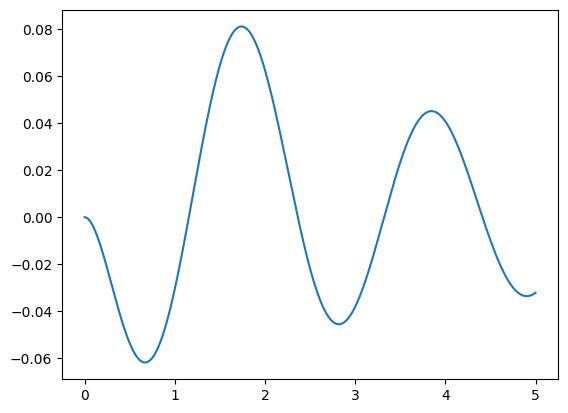

In [67]:
#@title Tempo de simulação
tempo = 5 #@param {type:"number"}
dt = 0.0001
t = np.arange(0, tempo, dt)
x = np.zeros(len(t))
y = np.zeros(len(t))
if tipo_de_entrada == "impulso":
    delay = int(C//dt)
    x[delay] = A/dt
if tipo_de_entrada == "cosseno":
    delay = int(C//dt)
    x[delay:] = A*np.cos(D*t[delay:]+E)
if tipo_de_entrada == "exponencial":
    delay = int(C//dt)
    x[delay:] = A*np.exp(B*t[delay:])
if tipo_de_entrada == "degrau":
    delay = int(C//dt)
    x[delay:] = A*np.ones(len(t[delay:]))
if tipo_de_entrada == "cosseno decaindo":
    delay = int(C//dt)
    x[delay:] = A*np.exp(B*t)*np.cos(D*t[delay:]+E)

state = np.zeros((len(a)-1,1))
Amatrix = np.zeros((len(a)-1, len(a)-1))
Bmatrix = np.zeros((len(a)-1,1))
Bmatrix[0,0] = 1
for i in range(1,len(a)-1):
    Amatrix[i,i-1] = 1
Amatrix[0,:] = -a[1:]
for i in range(0, len(t)):

    dstatedt = Amatrix@state + Bmatrix*x[i]
    state = state + dt*dstatedt


    y[i] = b[1:]@state + b[0]*dstatedt[0]
plt.plot(t, y)